In [1]:
#import necessary packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [147]:
#import data
#2019_20
PL19_20_fixtures = pd.read_csv('Data/2019-20/Fixtures/PL19_20_features.csv')
PL19_20_fixtures.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL19_20_lineups = pd.read_csv('Data/2019-20/Players/PL2019_lineups.csv')
PL19_20_lineups.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL19_20_player_stats = pd.read_csv('Data/2019-20/Players/PL2019_total.csv')
PL19_20_player_stats['player'] = PL19_20_player_stats['player'].fillna(0)
PL19_20_player_stats['team_rating'] = PL19_20_player_stats['team_rating'].fillna(0)
PL19_20_player_stats['category'] = PL19_20_player_stats['category'].fillna(0)
PL19_20_player_stats.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL19_20_player_stats['player_id'] = PL19_20_player_stats['player'].astype(str) + PL19_20_player_stats['team_rating'].astype(str) + PL19_20_player_stats['date'].astype(str)
PL19_20_player_stats['game_id'] = PL19_20_player_stats['team_rating'].astype(str) + PL19_20_player_stats['date'].astype(str)
PL19_20_lineups['player_id'] = PL19_20_lineups['player'] + PL19_20_lineups['team'] + PL19_20_lineups['date'].astype(str)
PL19_20_lineups['game_id'] = PL19_20_lineups['team'] + PL19_20_lineups['date'].astype(str)
#2020_21
PL20_21_fixtures = pd.read_csv('Data/2020-21/Fixtures/PL20_21_features.csv')
PL20_21_lineups = pd.read_csv('Data/2020-21/Players/PL2020_lineups.csv')
PL20_21_lineups.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL20_21_player_stats = pd.read_csv('Data/2020-21/Players/PL2020_total.csv')
PL20_21_lineups['player_id'] = PL20_21_lineups['player'] + PL20_21_lineups['team'] + PL20_21_lineups['date'].astype(str)
PL20_21_lineups['game_id'] = PL20_21_lineups['team'] + PL20_21_lineups['date'].astype(str)
PL20_21_lineups
PL20_21_player_stats = PL20_21_player_stats.rename(columns={'player_ID':'player_id','game_ID':'game_id'})
#2021_22
PL21_22_fixtures = pd.read_csv('Data/2021-22/Fixtures/PL21_22_features.csv')
PL21_22_lineups = pd.read_csv('Data/2021-22/Players/PL2021_lineups.csv')
PL21_22_lineups.replace(['Brighton & Hove Albion', 'Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion','West Ham United', 'Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham', 'West Brom' ,'West Ham', 'Wolves'], inplace=True)
PL21_22_player_stats = pd.read_csv('Data/2021-22/Players/PL2021_total.csv')
PL21_22_player_stats['player'] = PL21_22_player_stats['player'].fillna(0)
PL21_22_player_stats['category'] = PL21_22_player_stats['category'].fillna(0)
PL21_22_lineups['player_id'] = PL21_22_lineups['player'] + PL21_22_lineups['team'] + PL21_22_lineups['date'].astype(str)
PL21_22_lineups['game_id'] = PL21_22_lineups['team'] + PL21_22_lineups['date'].astype(str)
PL21_22_lineups
PL21_22_player_stats['player_id'] = PL21_22_player_stats['player'].astype(str) + PL21_22_player_stats['team'] + PL21_22_player_stats['date'].astype(str)
PL21_22_player_stats['game_id'] = PL21_22_player_stats['team'] + PL21_22_player_stats['date'].astype(str)

PL19_20_player_stats

,Unnamed: 0,player_fl,player,date,team_rating,category,minutes_fl,minutes_rating,rating,bonus,...,transfers_in,transfers_out,value,was_home,opponent_team,selected,player_ID,game_ID,player_id,game_id
0,0,Aaron Cresswell,Aaron Cresswell,2019-08-10,West Ham,Defender,90,90.0,16.471345,0,...,0,0,50,True,11,23399,Aaron CresswellWest Ham United2019-08-10,West Ham United2019-08-10,Aaron CresswellWest Ham2019-08-10,West Ham2019-08-10
1,1,Aaron Lennon,Aaron Lennon,2019-08-10,Burnley,Midfield,6,7.0,2.007932,0,...,0,0,50,True,16,8105,Aaron LennonBurnley2019-08-10,Burnley2019-08-10,Aaron LennonBurnley2019-08-10,Burnley2019-08-10
2,2,Aaron Mooy,Aaron Mooy,2019-08-10,0,0,0,NaN,0.000000,0,...,0,0,50,False,18,16261,NaN,NaN,Aaron Mooy02019-08-10,02019-08-10
3,3,Aaron Ramsdale,Aaron Ramsdale,2019-08-10,Bournemouth,Goalkeeper,90,90.0,37.868320,0,...,0,0,45,True,15,3091,Aaron RamsdaleBournemouth2019-08-10,Bournemouth2019-08-10,Aaron RamsdaleBournemouth2019-08-10,Bournemouth2019-08-10
4,4,Aaron Wan-Bissaka,Aaron Wan-Bissaka,2019-08-11,Manchester Utd,Defender,90,90.0,34.567219,2,...,0,0,55,True,6,1879259,Aaron Wan-BissakaManchester United2019-08-11,Manchester United2019-08-11,Aaron Wan-BissakaManchester Utd2019-08-11,Manchester Utd2019-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22556,22556,Youri Tielemans,Youri Tielemans,2020-07-26,Leicester City,Midfield,72,72.0,23.693602,0,...,1905,5008,61,True,12,283764,Youri TielemansLeicester City2020-07-26,Leicester City2020-07-26,Youri TielemansLeicester City2020-07-26,Leicester City2020-07-26
22557,22557,Yves Bissouma,Yves Bissouma,2020-07-26,Brighton,Midfield,72,72.0,10.941405,0,...,147,70,50,False,5,2136,Yves BissoumaBrighton & Hove Albion2020-07-26,Brighton & Hove Albion2020-07-26,Yves BissoumaBrighton2020-07-26,Brighton2020-07-26
22558,22558,Zech Medley,Zech Medley,2020-07-26,0,0,0,NaN,0.000000,0,...,325,172,40,True,18,2496,NaN,NaN,Zech Medley02020-07-26,02020-07-26
22559,22559,Çaglar Söyüncü,Çağlar Söyüncü,2020-07-26,0,0,0,NaN,0.000000,0,...,165,95680,49,True,12,688011,NaN,NaN,Çağlar Söyüncü02020-07-26,02020-07-26


In [127]:
PL21_22_player_stats

,Unnamed: 0,player_fl,player,date,team,team_rating,category,minutes_fl,minutes_rating,rating,...,transfers_in,transfers_out,value,was_home,opponent_team,selected,player_ID,game_ID,player_id,game_id
0,0,Eric Bailly,Eric Bailly,2021-08-14,Manchester Utd,NaN,0,0,NaN,0.000000,...,0,0,50,True,10,9363,NaN,NaN,NaN,Manchester Utd2021-08-14
1,1,Keinan Davis,Keinan Davis,2021-08-14,Aston Villa,NaN,0,0,NaN,0.000000,...,0,0,45,False,18,169789,NaN,NaN,NaN,Aston Villa2021-08-14
2,2,Ayotomiwa Dele-Bashiru,0,2021-08-14,Watford,NaN,0,0,NaN,0.000000,...,0,0,45,True,2,4092,NaN,NaN,NaN,Watford2021-08-14
3,3,James Ward-Prowse,James Ward-Prowse,2021-08-14,Southampton,Southampton,Midfield,90,90.0,28.509599,...,0,0,65,False,8,299682,James Ward-ProwseSouthampton2021-08-14,Southampton2021-08-14,James Ward-ProwseSouthampton2021-08-14,Southampton2021-08-14
4,4,Bruno Miguel Borges Fernandes,Bruno Fernandes,2021-08-14,Manchester Utd,Manchester United,Midfield,90,90.0,51.721369,...,0,0,120,True,10,3381004,Bruno FernandesManchester United2021-08-14,Manchester United2021-08-14,Bruno FernandesManchester United2021-08-14,Manchester Utd2021-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25442,25442,Wilfred Ndidi,Wilfred Ndidi,2022-05-22,Leicester City,NaN,0,0,NaN,0.000000,...,22,224,48,True,16,70366,NaN,NaN,NaN,Leicester City2022-05-22
25443,25443,Matt Ritchie,Matt Ritchie,2022-05-22,Newcastle Utd,Newcastle United,Forward,1,2.0,4.998869,...,396,253,49,False,5,15999,Matt RitchieNewcastle United2022-05-22,Newcastle United2022-05-22,Matt RitchieNewcastle United2022-05-22,Newcastle Utd2022-05-22
25444,25444,Nathan Redmond,Nathan Redmond,2022-05-22,Southampton,Southampton,Forward,82,82.0,19.069354,...,683,228,59,False,9,13856,Nathan RedmondSouthampton2022-05-22,Southampton2022-05-22,Nathan RedmondSouthampton2022-05-22,Southampton2022-05-22
25445,25445,Mathew Ryan,0,2022-05-22,Brighton,NaN,0,0,NaN,0.000000,...,0,2,45,True,19,587,NaN,NaN,NaN,Brighton2022-05-22


In [148]:
def get_wk(fixtures):
    home = fixtures[['HomeTeam', 'Wk_h', 'game_home_ID']]
    away = fixtures[['AwayTeam', 'Wk_a', 'game_away_ID']]
    home = home.rename(columns={'HomeTeam':'Team','Wk_h':'wk', 'game_home_ID': 'game_id'})
    away = away.rename(columns={'AwayTeam':'Team','Wk_a':'wk', 'game_away_ID': 'game_id'})
    return home.append(away)
game_weeks_19 = get_wk(PL19_20_fixtures)
game_weeks_20 = get_wk(PL20_21_fixtures)
game_weeks_21 = get_wk(PL21_22_fixtures)
game_weeks_19


C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\3116042645.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return home.append(away)
C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\3116042645.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return home.append(away)
C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\3116042645.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return home.append(away)


,Team,wk,game_id
0,Liverpool,1,Liverpool2019-08-09
1,West Ham,1,West Ham2019-08-10
2,Bournemouth,1,Bournemouth2019-08-10
3,Burnley,1,Burnley2019-08-10
4,Crystal Palace,1,Crystal Palace2019-08-10
...,...,...,...
375,Manchester Utd,38,Manchester Utd2020-07-26
376,Norwich City,38,Norwich City2020-07-26
377,Liverpool,38,Liverpool2020-07-26
378,Sheffield Utd,38,Sheffield Utd2020-07-26


In [149]:
#2019-20

PL19_20_lineups_tmp =  pd.merge(PL19_20_lineups, game_weeks_19[['game_id', 'wk']], on= 'game_id', how='right')
PL19_20_player_stats_tmp =  pd.merge(PL19_20_player_stats, game_weeks_19[['game_id', 'wk']], on= 'game_id', how='left')
PL19_20_lineups_tmp = pd.merge(PL19_20_lineups_tmp, PL19_20_player_stats_tmp[['player_id', 'category']], on= 'player_id')
#2020-21
PL20_21_lineups_tmp =  pd.merge(PL20_21_lineups, game_weeks_20[['game_id', 'wk']], on= 'game_id', how='left')
PL20_21_player_stats_tmp =  pd.merge(PL20_21_player_stats, game_weeks_20[['game_id', 'wk']], on= 'game_id', how='left')
PL20_21_lineups_tmp = pd.merge(PL20_21_lineups_tmp, PL20_21_player_stats_tmp[['player_id', 'category']], on= 'player_id')
#2021-22
PL21_22_lineups_tmp =  pd.merge(PL21_22_lineups, game_weeks_21[['game_id', 'wk']], on= 'game_id', how='left')
PL21_22_player_stats_tmp =  pd.merge(PL21_22_player_stats, game_weeks_21[['game_id', 'wk']], on= 'game_id', how='left')
PL21_22_lineups_tmp = pd.merge(PL21_22_lineups_tmp, PL21_22_player_stats_tmp[['player_id', 'category']], on= 'player_id')





In [150]:
PL19_20_fixtures_tmp = PL19_20_fixtures[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'game_home_ID', 'game_away_ID', 'Wk_h', 'Wk_a']]
PL20_21_fixtures_tmp = PL20_21_fixtures[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'game_home_ID', 'game_away_ID', 'Wk_h', 'Wk_a']]
PL21_22_fixtures_tmp = PL21_22_fixtures[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'game_home_ID', 'game_away_ID', 'Wk_h', 'Wk_a']]
PL19_20_fixtures_tmp

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_home_ID,game_away_ID,Wk_h,Wk_a
0,2019-08-09,20:00,Liverpool,Norwich City,4,1,H,Liverpool2019-08-09,Norwich City2019-08-09,1,1
1,2019-08-10,12:30,West Ham,Manchester City,0,5,A,West Ham2019-08-10,Manchester City2019-08-10,1,1
2,2019-08-10,15:00,Bournemouth,Sheffield Utd,1,1,D,Bournemouth2019-08-10,Sheffield Utd2019-08-10,1,1
3,2019-08-10,15:00,Burnley,Southampton,3,0,H,Burnley2019-08-10,Southampton2019-08-10,1,1
4,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,Crystal Palace2019-08-10,Everton2019-08-10,1,1
...,...,...,...,...,...,...,...,...,...,...,...
375,2020-07-26,16:00,Leicester City,Manchester Utd,0,2,A,Leicester City2020-07-26,Manchester Utd2020-07-26,38,38
376,2020-07-26,16:00,Manchester City,Norwich City,5,0,H,Manchester City2020-07-26,Norwich City2020-07-26,38,38
377,2020-07-26,16:00,Newcastle Utd,Liverpool,1,3,A,Newcastle Utd2020-07-26,Liverpool2020-07-26,38,38
378,2020-07-26,16:00,Southampton,Sheffield Utd,3,1,H,Southampton2020-07-26,Sheffield Utd2020-07-26,38,38


In [151]:
#PL20_21_fixtures
test_fixtures = PL19_20_fixtures[:20]
#test_fixtures = test_fixtures[:20]
test_fixtures



,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,Elo_h_after,Elo_a_after,Elo_h_before,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference
0,0,E0,2019-08-09,20:00,Liverpool,Norwich City,4,1,H,4,...,1515.00,1485.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,E0,2019-08-10,12:30,West Ham,Manchester City,0,5,A,0,...,1485.00,1515.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,E0,2019-08-10,15:00,Bournemouth,Sheffield Utd,1,1,D,0,...,1500.00,1500.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,H,0,...,1515.00,1485.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,0,...,1500.00,1500.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,E0,2019-08-10,15:00,Watford,Brighton,0,3,A,0,...,1485.00,1515.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,0,...,1515.00,1485.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,E0,2019-08-11,14:00,Leicester City,Wolves,0,0,D,0,...,1500.00,1500.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,E0,2019-08-11,14:00,Newcastle Utd,Arsenal,0,1,A,0,...,1485.00,1515.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,E0,2019-08-11,16:30,Manchester Utd,Chelsea,4,0,H,1,...,1515.00,1485.00,1500.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
def get_lineup(lineups_df, game_id):
    rslt_df = lineups_df[lineups_df['game_id'] == game_id]
    return rslt_df

def get_player_stats(player_stats, lineup, wk):
    tmp = pd.merge(player_stats, lineup[['player', 'start11']], on= 'player')
    df = tmp.drop(tmp[tmp.wk > wk].index)
    return df

def get_player_points(player_df, player, wk, stat):
    rslt_df = player_df[player_df['player'] ==player]
    rslt_df2 = rslt_df[rslt_df['wk'] ==wk]
    if rslt_df2.empty == True:
        return 0
    out = rslt_df2[stat]
    #print(out)
    out = out.values[0]
    return out

def get_stats_season(player_df, player, fr, to, stat):
    test = []
    out = 0
    df2 = 0
    if fr == to: return 0
    for i in range(int(fr), int (to)):
        out =  get_player_points(player_df ,player, i, stat)
        test.append(out)
        #print(test)
        df = pd.Series(test)
        df2 = df.ewm(alpha=0.9).mean()[len(df) - 1]
    return df2

def append_stats(features ,player_df,lineup_df ,stat):
    index = 0
    features_dict = features.to_dict('records')
    #for index, row in features.iterrows():
    start = time.process_time()
    for row in features_dict:
        lineup_h = get_lineup(lineup_df, row['game_home_ID'])
        lineup_a = get_lineup(lineup_df, row['game_away_ID'])
        lineup_h = lineup_h.to_dict('records')
        lineup_a = lineup_a.to_dict('records')
        rating_h_bench = 0
        rating_h_gk = 0
        rating_h_df = 0
        rating_h_mf = 0
        rating_h_att = 0
        rating_a_bench = 0
        rating_a_gk = 0
        rating_a_df = 0
        rating_a_mf = 0
        rating_a_att = 0
        influence_h = 0
        influence_a = 0
        creativity_h = 0
        creativity_a = 0
        threat_h = 0
        threat_a = 0
        selected_h = 0
        selected_a = 0
        bps_h = 0
        bps_a = 0
        #print(index)
        for row_l in lineup_h:
            if row_l['start11'] == False:
                rating_h_bench = rating_h_bench + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
            if row_l['category'] == 'Goalkeeper' and row_l['start11'] == True:
                rating_h_gk = rating_h_gk + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Defender'and row_l['start11'] == True:
                rating_h_df = rating_h_df + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Midfield'and row_l['start11'] == True:
                rating_h_mf = rating_h_mf + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Forward'and row_l['start11'] == True:
                rating_h_att = rating_h_att + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_h = influence_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_h = creativity_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_h = threat_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_h = bps_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_h = selected_h + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')

        for row_l in lineup_a:
            if row_l['start11'] == False:
                rating_a_bench = rating_a_bench + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
            if row_l['category'] == 'Goalkeeper' and row_l['start11'] == True:
                rating_a_gk = rating_a_gk + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Defender'and row_l['start11'] == True:
                rating_a_df = rating_a_df + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Midfield'and row_l['start11'] == True:
                rating_a_mf = rating_a_mf + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
            elif row_l['category'] == 'Forward'and row_l['start11'] == True:
                rating_a_att = rating_a_att + get_stats_season(player_df, row_l['player'],1, row_l['wk'], stat)
                influence_a = influence_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'influence')
                creativity_a = creativity_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'creativity')
                threat_a = threat_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'threat')
                bps_a = bps_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'bps')
                selected_a = selected_a + get_stats_season(player_df, row_l['player'],1, row_l['wk'], 'selected')
        features.loc[index, 'rating_h_gk'] = rating_h_gk
        features.loc[index, 'rating_h_df'] = rating_h_df
        features.loc[index, 'rating_h_mf'] = rating_h_mf
        features.loc[index, 'rating_h_att'] = rating_h_att
        features.loc[index, 'rating_h_bench'] = rating_h_bench
        features.loc[index, 'influence_h'] = influence_h
        features.loc[index, 'creativity_h'] = creativity_h
        features.loc[index, 'threat_h'] = threat_h
        features.loc[index, 'influence_h'] = influence_h
        features.loc[index, 'bps_h'] = bps_h
        features.loc[index, 'selected_h'] = selected_h
        features.loc[index, 'rating_a_gk'] = rating_a_gk
        features.loc[index, 'rating_a_df'] = rating_a_df
        features.loc[index, 'rating_a_mf'] = rating_a_mf
        features.loc[index, 'rating_a_att'] = rating_a_att
        features.loc[index, 'rating_a_bench'] = rating_a_bench
        features.loc[index, 'influence_a'] = influence_a
        features.loc[index, 'creativity_a'] = creativity_a
        features.loc[index, 'threat_a'] = threat_a
        features.loc[index, 'influence_a'] = influence_a
        features.loc[index, 'bps_a'] = bps_a
        features.loc[index, 'selected_a'] = selected_a
        index = index +1
        print(index)
    return features


player_ratings_19_a_09 = append_stats(test_fixtures, PL19_20_player_stats_tmp,PL19_20_lineups_tmp ,'rating')
player_ratings_19_a_09
#get_stats_season(player_df=PL21_22_player_stats_tmp, player='James Ward-Prowse', fr=1, to=2, stat='rating')
#player_ratings_21_a_09 = append_stats(test_fixtures, PL21_22_player_stats_tmp,PL21_22_lineups_tmp ,'rating')
#player_ratings_a_04 = append_stats(PL20_21_fixtures_tmp, PL20_21_player_stats_tmp, 'rating')
#player_ratings_a_04

C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\324412474.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[index, 'rating_h_gk'] = rating_h_gk
C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\324412474.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[index, 'rating_h_df'] = rating_h_df
C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\324412474.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,rating_a_gk,rating_a_df,rating_a_mf,rating_a_att,rating_a_bench,influence_a,creativity_a,threat_a,bps_a,selected_a
0,0,E0,2019-08-09,20:00,Liverpool,Norwich City,4,1,H,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,E0,2019-08-10,12:30,West Ham,Manchester City,0,5,A,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,E0,2019-08-10,15:00,Bournemouth,Sheffield Utd,1,1,D,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,H,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,5,E0,2019-08-10,15:00,Watford,Brighton,0,3,A,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,6,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,7,E0,2019-08-11,14:00,Leicester City,Wolves,0,0,D,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,8,E0,2019-08-11,14:00,Newcastle Utd,Arsenal,0,1,A,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,9,E0,2019-08-11,16:30,Manchester Utd,Chelsea,4,0,H,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [122]:
PL21_22_lineups_tmp

,player,team,matchweek,date,start11,player_id,game_id,wk,category
0,David Raya,Brentford,1.0,2021-08-13,True,David RayaBrentford2021-08-13,Brentford2021-08-13,1,Goalkeeper
1,Rico Henry,Brentford,1.0,2021-08-13,True,Rico HenryBrentford2021-08-13,Brentford2021-08-13,1,Defender
2,Ethan Pinnock,Brentford,1.0,2021-08-13,True,Ethan PinnockBrentford2021-08-13,Brentford2021-08-13,1,Defender
3,Christian Nørgaard,Brentford,1.0,2021-08-13,True,Christian NørgaardBrentford2021-08-13,Brentford2021-08-13,1,Midfield
4,Sergi Canós,Brentford,1.0,2021-08-13,True,Sergi CanósBrentford2021-08-13,Brentford2021-08-13,1,Defender
...,...,...,...,...,...,...,...,...,...
7332,Christian Kabasele,Watford,38.0,2022-05-22,True,Christian KabaseleWatford2022-05-22,Watford2022-05-22,38,Defender
7333,Edo Kayembe,Watford,38.0,2022-05-22,True,Edo KayembeWatford2022-05-22,Watford2022-05-22,38,Midfield
7334,Adam Masina,Watford,38.0,2022-05-22,False,Adam MasinaWatford2022-05-22,Watford2022-05-22,38,Defender
7335,Dan Gosling,Watford,38.0,2022-05-22,False,Dan GoslingWatford2022-05-22,Watford2022-05-22,38,Midfield


In [153]:
%%time
player_ratings_19_a_09 = append_stats(PL19_20_fixtures_tmp, PL19_20_player_stats_tmp,PL19_20_lineups_tmp ,'rating')
#player_ratings_21_a_09 = append_stats(PL21_22_fixtures_tmp, PL21_22_player_stats_tmp,PL21_22_lineups_tmp ,'rating')
#player_ratings_19_a_09 = append_stats(PL20_21_fixtures_tmp, PL20_21_player_stats_tmp, 'rating')
player_ratings_19_a_09

C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\324412474.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[index, 'rating_h_gk'] = rating_h_gk
C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\324412474.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[index, 'rating_h_df'] = rating_h_df
C:\Users\giuli\AppData\Local\Temp\ipykernel_32576\324412474.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_home_ID,game_away_ID,Wk_h,...,rating_a_gk,rating_a_df,rating_a_mf,rating_a_att,rating_a_bench,influence_a,creativity_a,threat_a,bps_a,selected_a
0,2019-08-09,20:00,Liverpool,Norwich City,4,1,H,Liverpool2019-08-09,Norwich City2019-08-09,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,2019-08-10,12:30,West Ham,Manchester City,0,5,A,West Ham2019-08-10,Manchester City2019-08-10,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,2019-08-10,15:00,Bournemouth,Sheffield Utd,1,1,D,Bournemouth2019-08-10,Sheffield Utd2019-08-10,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,2019-08-10,15:00,Burnley,Southampton,3,0,H,Burnley2019-08-10,Southampton2019-08-10,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,Crystal Palace2019-08-10,Everton2019-08-10,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2020-07-26,16:00,Leicester City,Manchester Utd,0,2,A,Leicester City2020-07-26,Manchester Utd2020-07-26,38,...,44.878377,125.328355,82.058080,95.169343,16.465348,185.716676,162.738526,131.698812,147.621855,1.135137e+07
376,2020-07-26,16:00,Manchester City,Norwich City,5,0,H,Manchester City2020-07-26,Norwich City2020-07-26,38,...,71.536143,65.295611,18.807222,24.109720,1.247658,143.394024,36.751759,52.108123,85.002512,1.432319e+06
377,2020-07-26,16:00,Newcastle Utd,Liverpool,1,3,A,Newcastle Utd2020-07-26,Liverpool2020-07-26,38,...,30.367880,82.832827,29.967888,36.093452,112.991424,191.264384,55.381715,77.869565,155.886248,6.034841e+06
378,2020-07-26,16:00,Southampton,Sheffield Utd,3,1,H,Southampton2020-07-26,Sheffield Utd2020-07-26,38,...,32.532346,109.916893,34.627228,8.350710,10.322622,93.912235,96.580645,77.492461,94.975871,5.663213e+06


In [154]:
player_ratings_19_a_09.to_csv('Data/2019-20/Players/player_ratings_19_a_09.csv')
#player_ratings_21_a_09.to_csv('Data/2021-22/Players/player_ratings_21_a_09.csv')

In [89]:
#import player ratings for 2020 to find best alpha
player_ratings_a_01 = pd.read_csv('Data/2020-21/Players/player_ratings_a_01.csv')
player_ratings_a_02 = pd.read_csv('Data/2020-21/Players/player_ratings_a_02.csv')
player_ratings_a_03 = pd.read_csv('Data/2020-21/Players/player_ratings_a_03.csv')
player_ratings_a_04 = pd.read_csv('Data/2020-21/Players/player_ratings_a_04.csv')
player_ratings_a_05 = pd.read_csv('Data/2020-21/Players/player_ratings_a_05.csv')
player_ratings_a_06 = pd.read_csv('Data/2020-21/Players/player_ratings_a_06.csv')
player_ratings_a_07 = pd.read_csv('Data/2020-21/Players/player_ratings_a_07.csv')
player_ratings_a_08 = pd.read_csv('Data/2020-21/Players/player_ratings_a_08.csv')
player_ratings_a_09 = pd.read_csv('Data/2020-21/Players/player_ratings_a_09.csv')

player_ratings_a_01.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_01['game_home_ID'] = player_ratings_a_01['HomeTeam'] + player_ratings_a_01['Date']
player_ratings_a_01['game_away_ID'] = player_ratings_a_01['AwayTeam'] + player_ratings_a_01['Date']
player_ratings_a_02.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_02['game_home_ID'] = player_ratings_a_02['HomeTeam'] + player_ratings_a_02['Date']
player_ratings_a_02['game_away_ID'] = player_ratings_a_02['AwayTeam'] + player_ratings_a_02['Date']
player_ratings_a_03.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_03['game_home_ID'] = player_ratings_a_03['HomeTeam'] + player_ratings_a_03['Date']
player_ratings_a_03['game_away_ID'] = player_ratings_a_03['AwayTeam'] + player_ratings_a_03['Date']
player_ratings_a_09.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_09['game_home_ID'] = player_ratings_a_09['HomeTeam'] + player_ratings_a_09['Date']
player_ratings_a_09['game_away_ID'] = player_ratings_a_09['AwayTeam'] + player_ratings_a_09['Date']
player_ratings_a_04.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_04['game_home_ID'] = player_ratings_a_04['HomeTeam'] + player_ratings_a_04['Date']
player_ratings_a_04['game_away_ID'] = player_ratings_a_04['AwayTeam'] + player_ratings_a_04['Date']
player_ratings_a_05.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_05['game_home_ID'] = player_ratings_a_05['HomeTeam'] + player_ratings_a_05['Date']
player_ratings_a_05['game_away_ID'] = player_ratings_a_05['AwayTeam'] + player_ratings_a_05['Date']
player_ratings_a_06.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_06['game_home_ID'] = player_ratings_a_06['HomeTeam'] + player_ratings_a_06['Date']
player_ratings_a_06['game_away_ID'] = player_ratings_a_06['AwayTeam'] + player_ratings_a_06['Date']
player_ratings_a_07.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_07['game_home_ID'] = player_ratings_a_07['HomeTeam'] + player_ratings_a_07['Date']
player_ratings_a_07['game_away_ID'] = player_ratings_a_07['AwayTeam'] + player_ratings_a_07['Date']
player_ratings_a_08.replace(['Brighton & Hove Albion','Manchester United', 'Newcastle United', 'Sheffield United', 'Tottenham Hotspur', 'West Bromwich Albion', 'West Ham United','Wolverhampton Wanderers'], ['Brighton', 'Manchester Utd','Newcastle Utd', 'Sheffield Utd', 'Tottenham','West Brom' ,'West Ham', 'Wolves'], inplace=True)
player_ratings_a_08['game_home_ID'] = player_ratings_a_08['HomeTeam'] + player_ratings_a_08['Date']
player_ratings_a_08['game_away_ID'] = player_ratings_a_08['AwayTeam'] + player_ratings_a_08['Date']

player_ratings_a_01 = player_ratings_a_01.add_suffix('_01')
player_ratings_a_01 = player_ratings_a_01.rename(columns={'game_home_ID_01':'game_home_ID'})
player_ratings_a_02 = player_ratings_a_02.add_suffix('_02')
player_ratings_a_02 = player_ratings_a_02.rename(columns={'game_home_ID_02':'game_home_ID'})
player_ratings_a_03 = player_ratings_a_03.add_suffix('_03')
player_ratings_a_03 = player_ratings_a_03.rename(columns={'game_home_ID_03':'game_home_ID'})
player_ratings_a_04 = player_ratings_a_04.add_suffix('_04')
player_ratings_a_04 = player_ratings_a_04.rename(columns={'game_home_ID_04':'game_home_ID'})
player_ratings_a_05 = player_ratings_a_05.add_suffix('_05')
player_ratings_a_05 = player_ratings_a_05.rename(columns={'game_home_ID_05':'game_home_ID'})
player_ratings_a_06 = player_ratings_a_06.add_suffix('_06')
player_ratings_a_06 = player_ratings_a_06.rename(columns={'game_home_ID_06':'game_home_ID'})
player_ratings_a_07 = player_ratings_a_07.add_suffix('_07')
player_ratings_a_07 = player_ratings_a_07.rename(columns={'game_home_ID_07':'game_home_ID'})
player_ratings_a_08 = player_ratings_a_08.add_suffix('_08')
player_ratings_a_08 = player_ratings_a_08.rename(columns={'game_home_ID_08':'game_home_ID'})
player_ratings_a_09 = player_ratings_a_09.add_suffix('_09')
player_ratings_a_09 = player_ratings_a_09.rename(columns={'game_home_ID_09':'game_home_ID'})

#import player ratings for other years
player_ratings_19_a_09 = pd.read_csv('Data/2019-20/Players/player_ratings_19_a_09.csv')
player_ratings_20_a_09 = pd.read_csv('Data/2020-21/Players/player_ratings_a_09.csv')
player_ratings_19_a_09 = pd.read_csv('Data/2021-22/Players/player_ratings_21_a_09.csv')



In [90]:
PL20_21_fixtures

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,Elo_h_after,Elo_a_after,Elo_h_before,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference
0,0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,1,E0,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,1,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,3,E0,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,0,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,4,E0,2020-09-13,14:00,West Brom,Leicester City,0,3,A,0,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,E0,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,1,...,1591.89,1439.73,1582.38,1449.24,2.500000,16.500000,12.833333,21.696989,133.14,5.500000
376,376,E0,2021-05-23,16:00,Manchester City,Everton,5,0,H,2,...,1659.36,1508.70,1649.79,1518.27,2.166667,1.666667,6.000000,24.270973,131.52,1.666667
377,377,E0,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,1,...,1358.16,1420.86,1338.90,1440.12,-4.833333,-8.333333,-12.500000,-19.027000,-101.22,-0.500000
378,378,E0,2021-05-23,16:00,West Ham,Southampton,3,0,H,2,...,1560.00,1420.08,1549.98,1430.10,2.833333,-3.500000,-6.666667,18.722710,119.88,2.500000


In [91]:
#merge player ratings for 2020
player_ratings =  pd.merge(player_ratings_a_01, player_ratings_a_02, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_03, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_04, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_05, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_06, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_07, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_08, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, player_ratings_a_09, on= 'game_home_ID', how='left')
player_ratings =  pd.merge(player_ratings, PL20_21_fixtures, on= 'game_home_ID', how='left')

player_ratings

,Unnamed: 0_01,Date_01,Time_01,HomeTeam_01,AwayTeam_01,FTHG_01,FTAG_01,FTR_01,game_home_ID,game_away_ID_01,...,Elo_h_after,Elo_a_after,Elo_h_before,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference
0,0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,Fulham2020-09-12,Arsenal2020-09-12,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,1,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,Crystal Palace2020-09-12,Southampton2020-09-12,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,2,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,Liverpool2020-09-12,Leeds United2020-09-12,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,3,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,West Ham2020-09-12,Newcastle Utd2020-09-12,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,4,2020-09-13,14:00,West Brom,Leicester City,0,3,A,West Brom2020-09-13,Leicester City2020-09-13,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,Liverpool2021-05-23,Crystal Palace2021-05-23,...,1591.89,1439.73,1582.38,1449.24,2.500000,16.500000,12.833333,21.696989,133.14,5.500000
376,376,2021-05-23,16:00,Manchester City,Everton,5,0,H,Manchester City2021-05-23,Everton2021-05-23,...,1659.36,1508.70,1649.79,1518.27,2.166667,1.666667,6.000000,24.270973,131.52,1.666667
377,377,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,Sheffield Utd2021-05-23,Burnley2021-05-23,...,1358.16,1420.86,1338.90,1440.12,-4.833333,-8.333333,-12.500000,-19.027000,-101.22,-0.500000
378,378,2021-05-23,16:00,West Ham,Southampton,3,0,H,West Ham2021-05-23,Southampton2021-05-23,...,1560.00,1420.08,1549.98,1430.10,2.833333,-3.500000,-6.666667,18.722710,119.88,2.500000


In [92]:
player_ratings

,Unnamed: 0_01,Date_01,Time_01,HomeTeam_01,AwayTeam_01,FTHG_01,FTAG_01,FTR_01,game_home_ID,game_away_ID_01,...,Elo_h_after,Elo_a_after,Elo_h_before,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference
0,0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,Fulham2020-09-12,Arsenal2020-09-12,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,1,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,Crystal Palace2020-09-12,Southampton2020-09-12,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,2,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,Liverpool2020-09-12,Leeds United2020-09-12,...,1515.00,1485.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,3,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,West Ham2020-09-12,Newcastle Utd2020-09-12,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,4,2020-09-13,14:00,West Brom,Leicester City,0,3,A,West Brom2020-09-13,Leicester City2020-09-13,...,1485.00,1515.00,1500.00,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,Liverpool2021-05-23,Crystal Palace2021-05-23,...,1591.89,1439.73,1582.38,1449.24,2.500000,16.500000,12.833333,21.696989,133.14,5.500000
376,376,2021-05-23,16:00,Manchester City,Everton,5,0,H,Manchester City2021-05-23,Everton2021-05-23,...,1659.36,1508.70,1649.79,1518.27,2.166667,1.666667,6.000000,24.270973,131.52,1.666667
377,377,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,Sheffield Utd2021-05-23,Burnley2021-05-23,...,1358.16,1420.86,1338.90,1440.12,-4.833333,-8.333333,-12.500000,-19.027000,-101.22,-0.500000
378,378,2021-05-23,16:00,West Ham,Southampton,3,0,H,West Ham2021-05-23,Southampton2021-05-23,...,1560.00,1420.08,1549.98,1430.10,2.833333,-3.500000,-6.666667,18.722710,119.88,2.500000


In [93]:
#calculate overall team rating for 2020
player_ratings['rating_01_h'] = player_ratings['rating_h_gk_01'] + player_ratings ['rating_h_df_01'] + player_ratings['rating_h_mf_01'] + player_ratings['rating_h_att_01'] + player_ratings['rating_h_bench_01']
player_ratings['rating_01_a'] = player_ratings['rating_a_gk_01'] + player_ratings ['rating_a_df_01'] + player_ratings['rating_a_mf_01'] + player_ratings['rating_a_att_01'] + player_ratings['rating_a_bench_01']
player_ratings['rating_02_h'] = player_ratings['rating_h_gk_02'] + player_ratings ['rating_h_df_02'] + player_ratings['rating_h_mf_02'] + player_ratings['rating_h_att_02'] + player_ratings['rating_h_bench_02']
player_ratings['rating_02_a'] = player_ratings['rating_a_gk_02'] + player_ratings ['rating_a_df_02'] + player_ratings['rating_a_mf_02'] + player_ratings['rating_a_att_02'] + player_ratings['rating_a_bench_02']
player_ratings['rating_03_h'] = player_ratings['rating_h_gk_03'] + player_ratings ['rating_h_df_03'] + player_ratings['rating_h_mf_03'] + player_ratings['rating_h_att_03'] + player_ratings['rating_h_bench_03']
player_ratings['rating_03_a'] = player_ratings['rating_a_gk_03'] + player_ratings ['rating_a_df_03'] + player_ratings['rating_a_mf_03'] + player_ratings['rating_a_att_03'] + player_ratings['rating_a_bench_03']
player_ratings['rating_04_h'] = player_ratings['rating_h_gk_04'] + player_ratings ['rating_h_df_04'] + player_ratings['rating_h_mf_04'] + player_ratings['rating_h_att_04'] + player_ratings['rating_h_bench_04']
player_ratings['rating_04_a'] = player_ratings['rating_a_gk_04'] + player_ratings ['rating_a_df_04'] + player_ratings['rating_a_mf_04'] + player_ratings['rating_a_att_04'] + player_ratings['rating_a_bench_04']
player_ratings['rating_05_h'] = player_ratings['rating_h_gk_05'] + player_ratings ['rating_h_df_05'] + player_ratings['rating_h_mf_05'] + player_ratings['rating_h_att_05'] + player_ratings['rating_h_bench_05']
player_ratings['rating_05_a'] = player_ratings['rating_a_gk_05'] + player_ratings ['rating_a_df_05'] + player_ratings['rating_a_mf_05'] + player_ratings['rating_a_att_05'] + player_ratings['rating_a_bench_05']
player_ratings['rating_06_h'] = player_ratings['rating_h_gk_06'] + player_ratings ['rating_h_df_06'] + player_ratings['rating_h_mf_06'] + player_ratings['rating_h_att_06'] + player_ratings['rating_h_bench_06']
player_ratings['rating_06_a'] = player_ratings['rating_a_gk_06'] + player_ratings ['rating_a_df_06'] + player_ratings['rating_a_mf_06'] + player_ratings['rating_a_att_06'] + player_ratings['rating_a_bench_06']
player_ratings['rating_07_h'] = player_ratings['rating_h_gk_07'] + player_ratings ['rating_h_df_07'] + player_ratings['rating_h_mf_07'] + player_ratings['rating_h_att_07'] + player_ratings['rating_h_bench_07']
player_ratings['rating_07_a'] = player_ratings['rating_a_gk_07'] + player_ratings ['rating_a_df_07'] + player_ratings['rating_a_mf_07'] + player_ratings['rating_a_att_07'] + player_ratings['rating_a_bench_07']
player_ratings['rating_08_h'] = player_ratings['rating_h_gk_08'] + player_ratings ['rating_h_df_08'] + player_ratings['rating_h_mf_08'] + player_ratings['rating_h_att_08'] + player_ratings['rating_h_bench_08']
player_ratings['rating_08_a'] = player_ratings['rating_a_gk_08'] + player_ratings ['rating_a_df_08'] + player_ratings['rating_a_mf_08'] + player_ratings['rating_a_att_08'] + player_ratings['rating_a_bench_08']
player_ratings['rating_09_h'] = player_ratings['rating_h_gk_09'] + player_ratings ['rating_h_df_09'] + player_ratings['rating_h_mf_09'] + player_ratings['rating_h_att_09'] + player_ratings['rating_h_bench_09']
player_ratings['rating_09_a'] = player_ratings['rating_a_gk_09'] + player_ratings ['rating_a_df_09'] + player_ratings['rating_a_mf_09'] + player_ratings['rating_a_att_09'] + player_ratings['rating_a_bench_09']

player_ratings['rating_difference_01'] = player_ratings['rating_01_h'] - player_ratings['rating_01_a']
player_ratings['rating_difference_02'] = player_ratings['rating_02_h'] - player_ratings['rating_02_a']
player_ratings['rating_difference_03'] = player_ratings['rating_03_h'] - player_ratings['rating_03_a']
player_ratings['rating_difference_04'] = player_ratings['rating_04_h'] - player_ratings['rating_04_a']
player_ratings['rating_difference_05'] = player_ratings['rating_05_h'] - player_ratings['rating_05_a']
player_ratings['rating_difference_06'] = player_ratings['rating_06_h'] - player_ratings['rating_06_a']
player_ratings['rating_difference_07'] = player_ratings['rating_07_h'] - player_ratings['rating_07_a']
player_ratings['rating_difference_08'] = player_ratings['rating_08_h'] - player_ratings['rating_08_a']
player_ratings['rating_difference_09'] = player_ratings['rating_09_h'] - player_ratings['rating_09_a']
player_ratings

,Unnamed: 0_01,Date_01,Time_01,HomeTeam_01,AwayTeam_01,FTHG_01,FTAG_01,FTR_01,game_home_ID,game_away_ID_01,...,rating_09_a,rating_difference_01,rating_difference_02,rating_difference_03,rating_difference_04,rating_difference_05,rating_difference_06,rating_difference_07,rating_difference_08,rating_difference_09
0,0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,Fulham2020-09-12,Arsenal2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,Crystal Palace2020-09-12,Southampton2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,Liverpool2020-09-12,Leeds United2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,2020-09-12,20:00,West Ham,Newcastle Utd,0,2,A,West Ham2020-09-12,Newcastle Utd2020-09-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,2020-09-13,14:00,West Brom,Leicester City,0,3,A,West Brom2020-09-13,Leicester City2020-09-13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,Liverpool2021-05-23,Crystal Palace2021-05-23,...,267.630667,189.484622,203.850536,208.263737,206.228374,206.228374,195.201308,189.934758,186.113059,184.205447
376,376,2021-05-23,16:00,Manchester City,Everton,5,0,H,Manchester City2021-05-23,Everton2021-05-23,...,355.553716,107.102630,73.453381,42.993726,16.955596,16.955596,-25.852219,-44.316432,-61.729694,-78.572844
377,377,2021-05-23,16:00,Sheffield Utd,Burnley,1,0,H,Sheffield Utd2021-05-23,Burnley2021-05-23,...,223.019166,30.734400,40.851231,58.668588,75.280753,75.280753,100.370736,110.014915,118.631575,126.722585
378,378,2021-05-23,16:00,West Ham,Southampton,3,0,H,West Ham2021-05-23,Southampton2021-05-23,...,378.471357,9.021531,0.874779,-4.532831,-6.144555,-6.144555,-3.077857,0.711924,5.397323,10.311974


In [94]:
#prepare Data for ML Algos, including all features from benchmark + rating differences
#add column for H A X
conditions = [
    (player_ratings['FTR_01'] == 'H'),
    (player_ratings['FTR_01'] == 'A'),
    (player_ratings['FTR_01'] == 'D')]
choices = [0, 1, 2]
player_ratings['identifier'] = np.select(conditions, choices)
#PL20_21_features.drop(PL20_21_features[ PL20_21_features.Wk < 6].index, inplace=True)
y = player_ratings['identifier'].to_numpy()
#feature_names = ['rating_h_gk_01', 'rating_a_gk_01', 'rating_h_df_01', 'rating_a_df_01', 'rating_h_mf_01', 'rating_a_mf_01', 'rating_h_att_01','rating_a_att_01', 'rating_h_bench_01', 'rating_a_bench_01', 'rating_h_gk_02', 'rating_a_gk_02', 'rating_h_df_02', 'rating_a_df_02', 'rating_h_mf_02', 'rating_a_mf_02', 'rating_h_att_02','rating_a_att_02', 'rating_h_bench_02', 'rating_a_bench_02', 'rating_h_gk_03', 'rating_a_gk_03', 'rating_h_df_03', 'rating_a_df_03', 'rating_h_mf_03', 'rating_a_mf_03', 'rating_h_att_03','rating_a_att_03', 'rating_h_bench_03', 'rating_a_bench_03', 'rating_h_gk_04', 'rating_a_gk_04', 'rating_h_df_04', 'rating_a_df_04', 'rating_h_mf_04', 'rating_a_mf_04', 'rating_h_att_04','rating_a_att_04', 'rating_h_bench_04', 'rating_a_bench_04', 'rating_h_gk_05', 'rating_a_gk_05', 'rating_h_df_05', 'rating_a_df_05', 'rating_h_mf_05', 'rating_a_mf_05', 'rating_h_att_05','rating_a_att_05', 'rating_h_bench_05', 'rating_a_bench_05', 'rating_h_gk_06', 'rating_a_gk_06', 'rating_h_df_06', 'rating_a_df_06', 'rating_h_mf_06', 'rating_a_mf_06', 'rating_h_att_06','rating_a_att_06', 'rating_h_bench_06', 'rating_a_bench_06', 'rating_h_gk_07', 'rating_a_gk_07', 'rating_h_df_07', 'rating_a_df_07', 'rating_h_mf_07', 'rating_a_mf_07', 'rating_h_att_07','rating_a_att_07', 'rating_h_bench_07', 'rating_a_bench_07', 'rating_h_gk_08', 'rating_a_gk_08', 'rating_h_df_08', 'rating_a_df_08', 'rating_h_mf_08', 'rating_a_mf_08', 'rating_h_att_08','rating_a_att_08', 'rating_h_bench_08', 'rating_a_bench_08', 'rating_h_gk_09', 'rating_a_gk_09', 'rating_h_df_09', 'rating_a_df_09', 'rating_h_mf_09', 'rating_a_mf_09', 'rating_h_att_09','rating_a_att_09', 'rating_h_bench_09', 'rating_a_bench_09']
feature_names = ['rating_difference_01', 'rating_difference_02', 'rating_difference_03', 'rating_difference_04', 'rating_difference_05', 'rating_difference_06', 'rating_difference_07', 'rating_difference_08', 'rating_difference_09', 'Rating difference', 'Rating_Home', 'Rating_Away', 'ewmH', 'ewmA', 'ewmDifference', 'Elo_h_before','Elo_a_before', 'elo_difference', 'goalsH', 'goalsA', 'goalsDifference', 'shotsH', 'shotsA','shotsDifference', 'cornersH', 'cornersA', 'cornersDifference', 'formH', 'formA', 'form_difference']
X = player_ratings[feature_names].to_numpy()
X

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 30.73439985,  40.8512308 ,  58.6685878 , ...,   2.5       ,
          3.        ,  -0.5       ],
       [  9.02153099,   0.87477906,  -4.53283113, ...,   4.66666667,
          2.16666667,   2.5       ],
       [109.73462699, 123.46695542, 132.95179329, ...,   7.        ,
          7.66666667,  -0.66666667]])

In [95]:
#split Data in training and test set and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
rf_model.score(X_test, y_test)

0.5526315789473685

In [97]:
# select = SelectKBest(score_func=f_classif, k=1)
# z = select.fit_transform(X,y)
#
# print("Best Feature:", z.shape)

In [259]:
# from numpy import array
# filter = select.get_support()
# features = array(feature_names)
#
# #print("All features:")
# #print(features)
#
# print("Selected best 3:")
# print(features[filter])
# #print(z)

Selected best 3:
['Rating difference']


0.5348242979821928
Rating difference       0.049887
Elo_a_before            0.042518
Elo_h_before            0.041777
shotsDifference         0.040843
goalsH                  0.038322
Rating_Away             0.037747
elo_difference          0.035045
rating_difference_09    0.034859
ewmDifference           0.034798
goalsDifference         0.034595
shotsH                  0.034345
ewmA                    0.033893
cornersDifference       0.033734
rating_difference_01    0.033703
cornersA                0.033249
cornersH                0.032415
rating_difference_08    0.032251
formH                   0.031979
ewmH                    0.031850
form_difference         0.031692
rating_difference_05    0.031412
rating_difference_06    0.030879
rating_difference_07    0.030770
rating_difference_02    0.030738
rating_difference_04    0.030591
shotsA                  0.030470
rating_difference_03    0.030206
goalsA                  0.027981
formA                   0.027395
Rating_Home             

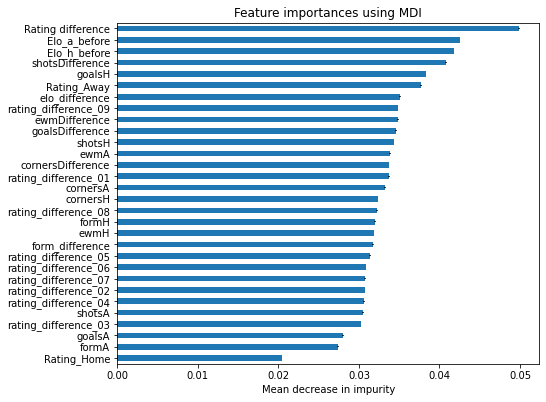

In [98]:
%%time
#split Data in training and test set
d_1 = 0
d_2 = 0
d_3 = 0
d_4 = 0
d_5 = 0
d_6 = 0
d_7 = 0
d_8 = 0
d_9 = 0
rating_dif = 0
rating_h = 0
rating_a = 0
ewm_h = 0
ewm_a = 0
ewm_dif = 0
elo_h = 0
elo_a = 0
elo_dif = 0
goals_h = 0
goals_a = 0
goals_dif = 0
shots_h = 0
shots_a = 0
shots_dif = 0
corners_h = 0
corners_a = 0
corners_dif = 0
form_h = 0
form_a = 0
form_dif = 0


score = []
i = 1000
for i in range(1, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    score.append(rf_model.score(X_test, y_test))
    importances = rf_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    d_1 = d_1 + forest_importances.rating_difference_01
    d_2 = d_2 + forest_importances.rating_difference_02
    d_3 = d_3 + forest_importances.rating_difference_03
    d_4 = d_4 + forest_importances.rating_difference_04
    d_5 = d_5 + forest_importances.rating_difference_05
    d_6 = d_6 + forest_importances.rating_difference_06
    d_7 = d_7 + forest_importances.rating_difference_07
    d_8 = d_8 + forest_importances.rating_difference_08
    d_9 = d_9 + forest_importances.rating_difference_09

    rating_dif = rating_dif + forest_importances['Rating difference']
    rating_h = rating_h + forest_importances.Rating_Home
    rating_a = rating_a + forest_importances.Rating_Away
    ewm_h = ewm_h + forest_importances.ewmH
    ewm_a = ewm_a + forest_importances.ewmA
    ewm_dif = ewm_dif + forest_importances.ewmDifference
    elo_h = elo_h + forest_importances.Elo_h_before
    elo_a = elo_a + forest_importances.Elo_a_before
    elo_dif = elo_dif+ forest_importances.elo_difference
    goals_h = goals_h+ forest_importances.goalsH
    goals_a = goals_a+ forest_importances.goalsA
    goals_dif = goals_dif+ forest_importances.goalsDifference
    shots_h = shots_h+ forest_importances.shotsH
    shots_a = shots_a+ forest_importances.shotsA
    shots_dif = shots_dif+ forest_importances.shotsDifference
    corners_h = corners_h+ forest_importances.cornersH
    corners_a = corners_a+ forest_importances.cornersA
    corners_dif = corners_dif+ forest_importances.cornersDifference
    form_h = form_h+ forest_importances.formH
    form_a = form_a+ forest_importances.formA
    form_dif = form_dif+ forest_importances.form_difference

fig, ax = plt.subplots()
forest_importances.rating_difference_01 = d_1/i
forest_importances.rating_difference_02 = d_2/i
forest_importances.rating_difference_03 = d_3/i
forest_importances.rating_difference_04 = d_4/i
forest_importances.rating_difference_05 = d_5/i
forest_importances.rating_difference_06 = d_6/i
forest_importances.rating_difference_07 = d_7/i
forest_importances.rating_difference_08 = d_8/i
forest_importances.rating_difference_09 = d_9/i
forest_importances['Rating difference'] = rating_dif/i
forest_importances.Rating_Home = rating_h/i
forest_importances.Rating_Away = rating_a/i
forest_importances.ewmH = ewm_h/i
forest_importances.ewmA = ewm_a/i
forest_importances.ewmDifference = ewm_dif/i
forest_importances.Elo_h_before = elo_h/i
forest_importances.Elo_h_before = elo_a/i
forest_importances.elo_difference = elo_dif/i
forest_importances.goalsH = goals_h/i
forest_importances.goalsA = goals_a/i
forest_importances.goalsDifference = goals_dif/i
forest_importances.shotsH = shots_h/i
forest_importances.shotsA = shots_a/i
forest_importances.shotsDifference = shots_dif/i
forest_importances.cornersH = corners_h/i
forest_importances.cornersA = corners_a/i
forest_importances.cornersDifference = corners_dif/i
forest_importances.formH = form_h/i
forest_importances.formA = form_a/i
forest_importances.form_difference = form_dif/i




forest_importances = forest_importances.sort_values()
forest_importances.plot.barh(ax=ax, yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout(pad=-5, w_pad=0.5, h_pad=-2)
print(np.mean(score))
print(forest_importances.sort_values(ascending=False))



In [2]:
#only stats with alpha = 0.9
player_ratings_09 =  pd.merge(player_ratings_a_09, PL20_21_fixtures, on= 'game_home_ID', how='left')
#create differences
player_ratings_09['gk_difference'] = player_ratings_09['rating_h_gk_09'] - player_ratings_09['rating_a_gk_09']
player_ratings_09['df_difference'] = player_ratings_09['rating_h_df_09'] - player_ratings_09['rating_a_df_09']
player_ratings_09['mf_difference'] = player_ratings_09['rating_h_mf_09'] - player_ratings_09['rating_a_mf_09']
player_ratings_09['att_difference'] = player_ratings_09['rating_h_att_09'] - player_ratings_09['rating_a_att_09']
player_ratings_09['bench_difference'] = player_ratings_09['rating_h_bench_09'] - player_ratings_09['rating_a_bench_09']
player_ratings_09['influence_difference'] = player_ratings_09['influence_h_09'] - player_ratings_09['influence_a_09']
player_ratings_09['creativity_difference'] = player_ratings_09['creativity_h_09'] - player_ratings_09['creativity_a_09']
player_ratings_09['threat_difference'] = player_ratings_09['threat_h_09'] - player_ratings_09['threat_a_09']
player_ratings_09['bps_difference'] = player_ratings_09['bps_h_09'] - player_ratings_09['bps_a_09']
player_ratings_09['selected_difference'] = player_ratings_09['selected_h_09'] - player_ratings_09['selected_a_09']
player_ratings_09['overall_h'] = player_ratings_09['rating_h_gk_09'] + player_ratings_09['rating_h_df_09'] + player_ratings_09['rating_h_mf_09'] + player_ratings_09['rating_h_att_09'] + player_ratings_09['rating_h_bench_09']
player_ratings_09['overall_a'] = player_ratings_09['rating_a_gk_09'] + player_ratings_09['rating_a_df_09'] + player_ratings_09['rating_a_mf_09'] + player_ratings_09['rating_a_att_09'] + player_ratings_09['rating_a_bench_09']
player_ratings_09['overall_difference'] = player_ratings_09['overall_h'] - player_ratings_09['overall_a']
player_ratings_09

NameError: name 'player_ratings_a_09' is not defined

In [99]:
score = []
score2 = []
i = 500
for i in range(1, i):
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    xgb_model = xgb.XGBClassifier(seed=82)
    xgb_model.fit(X_train, y_train)
    score2.append(xgb_model.score(X_test, y_test))
    score.append(rf_model.score(X_test, y_test))
print(np.mean(score))
print(np.mean(score2))

0.5327233414196816
0.5131578947368423


0.5


,H,D,A
0,0.02,0.97,0.01
1,0.76,0.22,0.02
2,0.85,0.15,0.00
3,0.68,0.30,0.02
4,0.02,0.96,0.02
...,...,...,...
375,0.87,0.11,0.02
376,0.37,0.43,0.20
377,0.80,0.14,0.06
378,0.76,0.18,0.06


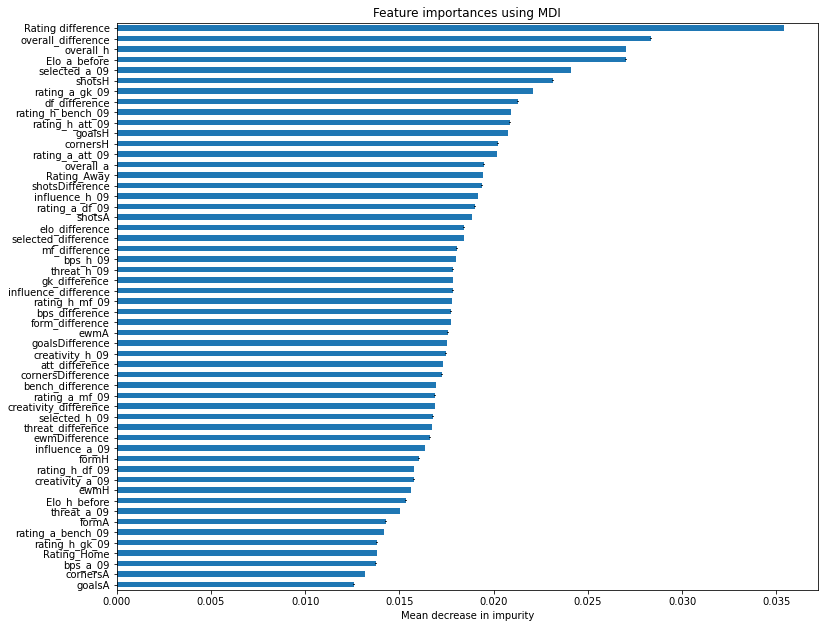

In [102]:
#prepare Data for ML Algos
#add column for H A X
#player_ratings_09_tmp = player_ratings_09.iloc[30:]
player_ratings_09_tmp = player_ratings_09
conditions = [
    (player_ratings_09_tmp['FTR_09'] == 'H'),
    (player_ratings_09_tmp['FTR_09'] == 'A'),
    (player_ratings_09_tmp['FTR_09'] == 'D')]
choices = [0, 1, 2]
player_ratings_09_tmp['identifier'] = np.select(conditions, choices)
#PL20_21_features.drop(PL20_21_features[ PL20_21_features.Wk < 6].index, inplace=True)
y = player_ratings_09_tmp['identifier'].to_numpy()
feature_names = ['rating_h_gk_09', 'Rating difference', 'Rating_Home', 'Rating_Away', 'ewmH', 'ewmA', 'ewmDifference', 'Elo_h_before','Elo_a_before', 'elo_difference', 'goalsH', 'goalsA', 'goalsDifference', 'shotsH', 'shotsA','shotsDifference', 'cornersH', 'cornersA', 'cornersDifference', 'formH', 'formA', 'form_difference', 'rating_a_gk_09', 'rating_h_df_09', 'rating_a_df_09', 'rating_h_mf_09', 'rating_a_mf_09', 'rating_h_att_09', 'rating_a_att_09', 'rating_h_bench_09', 'rating_a_bench_09', 'influence_h_09', 'influence_a_09', 'creativity_h_09', 'creativity_a_09', 'threat_h_09', 'threat_a_09', 'bps_h_09', 'bps_a_09', 'selected_h_09', 'selected_a_09', 'gk_difference', 'df_difference', 'mf_difference', 'att_difference', 'bench_difference','overall_difference' ,'influence_difference', 'creativity_difference', 'threat_difference', 'bps_difference', 'selected_difference', 'overall_h', 'overall_a']
#feature_names = ['Rating difference', 'Rating_Home', 'Rating_Away', 'ewmH', 'ewmA', 'ewmDifference', 'Elo_h_before','Elo_a_before', 'elo_difference', 'goalsH', 'goalsA', 'goalsDifference', 'shotsH', 'shotsA','shotsDifference', 'cornersH', 'cornersA', 'cornersDifference', 'formH', 'formA', 'form_difference']
X = player_ratings_09_tmp[feature_names].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
score.append(rf_model.score(X_test, y_test))
#start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
#elapsed_time = time.time() - start_time


#feature_names = [f"feature {i}" for i in range(X.shape[1])]


forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values()
fig, ax = plt.subplots()
fig.tight_layout(pad=-15, w_pad=0.5, h_pad=-2)

forest_importances.plot.barh(ax=ax, yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
print(rf_model.score(X_test, y_test))

np_prob = rf_model.predict_proba(X=X)
df = pd.DataFrame(np_prob, columns = ['H','D','A'])
df
#df.to_csv('Data/2020-21/Fixtures/probabilities.csv')
#fig.tight_layout(pad=-15, w_pad=0.5, h_pad=-2)

In [384]:
df.to_csv('Data/2020-21/Fixtures/probabilities_ohne_pl_stats.csv')